**Value at Risk (VaR):** Quantifies potential loss for a given confidence level and time horizon.

**Z-Score:** Number of standard deviations that a value is from the average.

$$
Z = \frac{X - \mu}{\sigma}
$$

In VaR, we want to know the loss we can get at a specific confidence level, which corresponds to \( X \) in the previous equation:

$$
\text{VaR} = \mu - \sigma \cdot \text{Z-score}
$$

To simulate the values that a stock can take, the Geometric Brownian Motion is used:

$$
S_t = S_0 \cdot e^{\left( \mu - \frac{1}{2} \sigma^2 \right)t + \sigma W_t}
$$

First, we are going to calculate the **Hisotrical VaR** which is computed with just calculating the 5th percentil. As we are using a GBM, the result will be the same as **Monte Carlo VaR**

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

S0 = 100 #Initial price
mu = 0.08 #Expected return
sigma = 0.2 # Annual volatility
T = 1 #Time horizon
N = 252 #Number of days (252 days = 1 year)
dt = T / N #Time step (1year/252days)=0.003968253968253968
n_sim = 10000 #Number of simulations


np.random.seed(42)
Z = np.random.standard_normal((N, n_sim))   
W = np.cumsum(Z, axis=0) * np.sqrt(dt)      
time = np.linspace(0, T, N).reshape(-1, 1)
S = S0 * np.exp((mu - 0.5 * sigma**2) * time + sigma * W)


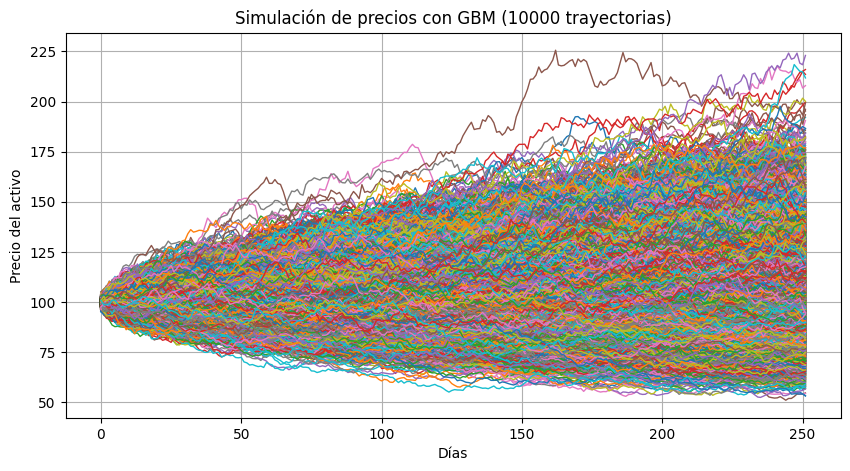

In [19]:
plt.figure(figsize=(10, 5))
for i in range(10000):
    plt.plot(S[:, i], linewidth=1)
plt.title("Simulación de precios con GBM (10000 trayectorias)")
plt.xlabel("Días")
plt.ylabel("Precio del activo")
plt.grid(True)
plt.show()


Historic VaR (95%): 23.5754%


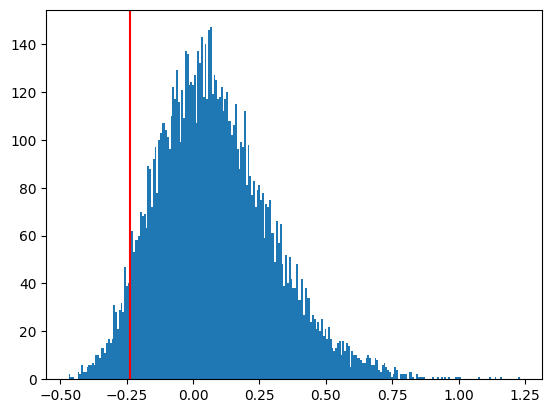

In [26]:
returns = (S[-1]- S0)/S0

plt.hist(returns, bins=252)
plt.axvline(x=np.percentile(returns, 5), color='r')

Historic_VaR = -np.percentile(returns, 5) #5th percentile = the left part of the distribution

print(f"Historic VaR (95%): {Historic_VaR*100:.4f}%")

The **historic VaR** is **23.574%**, which means that we won't lose the 23.574% of our investment in the first year. The 5th percentile was used because we calculate de IC 95% in the worst case. In a real case, it should be with the **real past return data**.

The **parametric VaR** assumes that returns are distributed normally:
 $$
\text{VaR}_\alpha  = -(\mu - z_\alpha \cdot \sigma)
$$

In a normal distribution, the $z_\alpha = -1.645$.



In [28]:
Parametric_VaR = -(mu -abs(norm.ppf(0.05))*sigma)

print(f"Parametric VaR (95%): {Parametric_VaR*100:.4f}%")

Parametric VaR (95%): 24.8971%


**Expected Shortfall:** In case losing more as VaR, how much I will lose on average. To calculated, we compute the average of all the simulations which the loss is higher than the **VaR**.
$$
\text{ES}_\alpha = \mathbb{E}[\text{Loss} \mid \text{Loss} > \text{VaR}_\alpha]
$$



In [29]:
Expected_Shortfall_95 = -returns[returns < -Historic_VaR].mean()

print(f"Expected Shortfall (95%): {Expected_Shortfall_95*100:.4f}%")

Expected Shortfall (95%): 29.5545%
